In [11]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
#import seaborn as sns

In [12]:
episodes_rewards = genfromtxt('logs/episodes_rewards.csv', delimiter=', ')
no_regulator = genfromtxt('logs/no_regulator.csv', delimiter=', ')

In [13]:
episodes_rewards

array([[0.00000e+00, 5.13288e+05],
       [1.00000e+00, 4.89014e+05],
       [2.00000e+00, 2.69020e+05],
       ...,
       [3.46600e+03, 6.20075e+05],
       [3.46700e+03, 6.40067e+05],
       [3.46800e+03, 6.38037e+05]])

In [14]:
no_regulator

array([[0.00000e+00, 4.89315e+05],
       [1.00000e+00, 7.14180e+04],
       [2.00000e+00, 2.57020e+04],
       ...,
       [1.49900e+04, 4.30360e+04],
       [1.49910e+04, 3.85460e+04],
       [1.49920e+04, 4.32320e+04]])

In [15]:
no_regulator = no_regulator[:3469]

In [18]:
def moving_average(arr, n=5) :
    ret = np.cumsum(arr, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

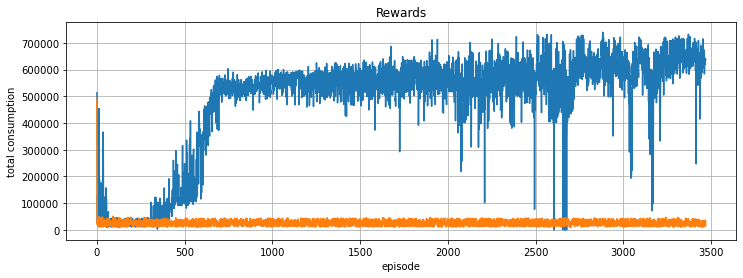

In [19]:
x1 = episodes_rewards[:,0]
y1 = episodes_rewards[:,1]

x2 = no_regulator[:,0]
y2 = no_regulator[:,1]

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x1, y1)
ax.plot(x2, y2)

ax.set(xlabel='episode', ylabel='total consumption',
       title='Rewards')
ax.grid()

fig.savefig("test.png")
plt.show()

In [20]:
mov_avg_rewards = moving_average(episodes_rewards[:,1])
mov_avg_no_regulator = moving_average(no_regulator[:,1])

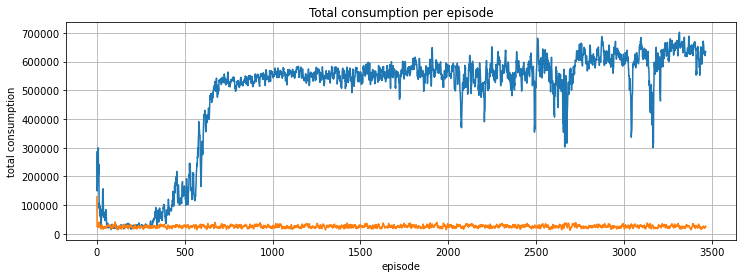

In [22]:
x1 = episodes_rewards[:3465,0]
y1 = mov_avg_rewards

x2 = no_regulator[:3465,0]
y2 = mov_avg_no_regulator

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x1, y1)
ax.plot(x2, y2)

ax.set(xlabel='episode', ylabel='total consumption',
       title='Total consumption per episode')
ax.grid()

fig.savefig("rewards_plot.png")
plt.show()